# Приоритизация гипотез и анализ A/B-теста

Подготовлен список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

## Часть 1. Приоритизация гипотез.

#### Описание данных

Файл `/datasets/hypothesis.csv`:

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence`— уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import math as mth


hyp = pd.read_csv('/datasets/hypothesis.csv')
hyp.columns = hyp.columns.str.lower()

display(hyp.head())
print('-------------------------')

print('Размер исходной таблицы:')
print(hyp.shape)
print('-------------------------')

print('Типы данных:')
print(hyp.info())
print('-------------------------')

print('Пропущенные значения:')
print(hyp.isna().sum())
print('-------------------------')

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


-------------------------
Размер исходной таблицы:
(9, 5)
-------------------------
Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
-------------------------
Пропущенные значения:
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
-------------------------


Опишем используемые формулы:


$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$


Применим фреймворк ICE для приоритизации гипотез.

In [2]:
hyp['ice'] = hyp['impact'] * hyp['confidence'] / hyp['efforts']

print(hyp[['hypothesis','ice']].sort_values(by='ice', ascending=False))

                                          hypothesis        ice
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Применим фреймворк RICE для приоритизации гипотез.

In [3]:
hyp['rice'] = hyp['reach'] * hyp['impact'] * hyp['confidence'] / hyp['efforts']

print(hyp[['hypothesis','rice']].sort_values(by='rice',ascending=False))

                                          hypothesis   rice
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


In [4]:
hyp[['hypothesis','reach']].sort_values(by='reach',ascending=False)

,hypothesis,reach
7,Добавить форму подписки на все основные страни...,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8
3,"Изменить структура категорий, что увеличит кон...",8
6,Показать на главной странице баннеры с актуаль...,5
0,"Добавить два новых канала привлечения трафика,...",3
4,"Изменить цвет фона главной страницы, чтобы уве...",3
5,"Добавить страницу отзывов клиентов о магазине,...",3
1,"Запустить собственную службу доставки, что сок...",2
8,"Запустить акцию, дающую скидку на товар в день...",1


### Выводы

Согласно **ICE** наиболее перспективными гипотезами являются: 
- 'Запустить акцию, дающую скидку на товар в день рождения'
- 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
- 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

Согласно **RICE** наиболее перспективными гипотезами являются: 
- 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
- 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
- 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'

**RICE** является разновидностью **ICE** и учитывает скольких пользователей затронет изменение. Видим, что скидки на день рождения затрагивают наименьшее количество пользователей. Несколько больше пользователей затронет привлечение клиентов из других каналов. Добавление формы подписки и блоков рекомендаций затронет наибольшее количество пользователей, что логично: указанные изменения производятся не только для именинников и клиентов из новых каналов. 

В результате мы получили, что метод приоритезации задач **ICE** показывает перспективность скидок на день рождения, а в **RICE** скидки не попали из-за низкого показателя *reach*. По итогам расчета обоих показателей явным образом выделяется *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*, так как попала в топ рейтинга по итогам расчета как первого, так и второго показателя.

## Часть 2. Анализ A/B-теста

#### Описание данных

Файл `/datasets/orders.csv`

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.


Файл `/datasets/visitors.csv`

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [5]:
orders = pd.read_csv('/datasets/orders.csv', parse_dates=['date'])
visits = pd.read_csv('/datasets/visitors.csv', parse_dates=['date'])
orders.name = 'orders'
visits.name = 'visits'
orders.columns = orders.columns.str.lower()
visits.columns = visits.columns.str.lower()

for df in (orders,visits):
    
    print('Имя таблицы: ',df.name)
    display(df.head())
    print('-------------------------')

    print('Размер исходной таблицы:')
    print(df.shape)
    print('-------------------------')

    print('Типы данных:')
    print(df.info())
    print('-------------------------')

    print('Пропущенные значения:')
    print(df.isna().sum())
    print('-------------------------')
    print('-------------------------')

Имя таблицы:  orders


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


-------------------------
Размер исходной таблицы:
(1197, 5)
-------------------------
Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
-------------------------
Пропущенные значения:
transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64
-------------------------
-------------------------
Имя таблицы:  visits


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


-------------------------
Размер исходной таблицы:
(62, 3)
-------------------------
Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None
-------------------------
Пропущенные значения:
date        0
group       0
visitors    0
dtype: int64
-------------------------
-------------------------


#### 1. Построим график кумулятивной выручки по группам

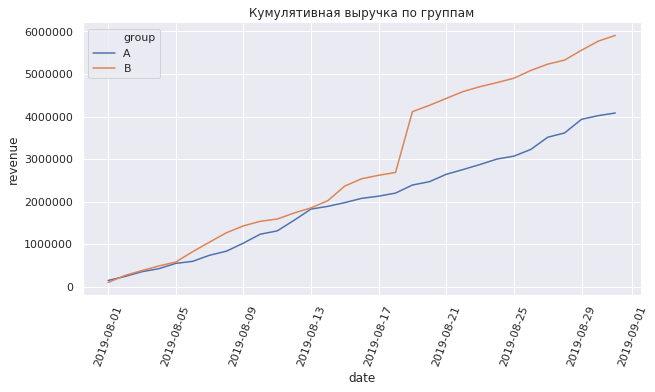

In [26]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# создаем массив уникальных пар значений дат и групп теста
datesgroups = orders[['date','group']].drop_duplicates()

# функция, которая считаем кумулятивную выручку, количество уникальных транзакций и клиентов
comulate_culc_func = lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].\
    agg({'date' : 'max', \
          'group' : 'max', \
          'transactionid' : pd.Series.nunique, 
          'visitorid' : pd.Series.nunique, \
          'revenue' : 'sum'})
# функция, которая считаем кумулятивное количество посетителей
comulate_culc_func_2 = lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].\
    agg({'date' : 'max', \
         'group' : 'max', \
         'visitors' : 'sum'})

# применим и отсортируем
ordersagg = datesgroups.\
    apply(comulate_culc_func, axis=1).\
    sort_values(by=['date','group'])

# сделаем то же самое для посетителей
visitsagg = datesgroups.\
    apply(comulate_culc_func_2, axis=1).\
    sort_values(by=['date','group'])

ordersagg = pd.merge(ordersagg,visitsagg, on=['date','group'],how='left')

sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
#fig = sns.figsize(8,12)
sns.lineplot(x="date", y="revenue", hue="group", data=ordersagg)
sns.despine()
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=70)
plt.show()

#### 2. Построим график кумулятивного среднего чека по группам.

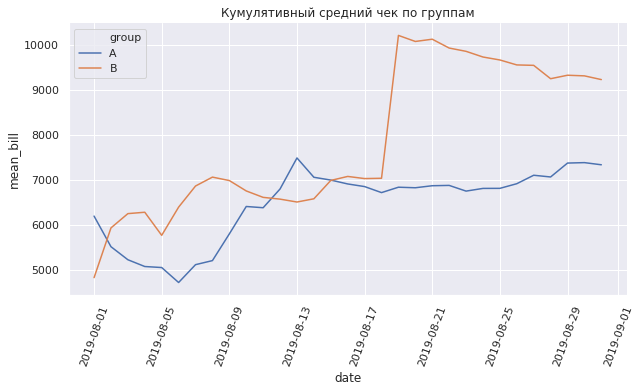

In [7]:
ordersagg = ordersagg.eval('mean_bill = revenue / transactionid')

plt.figure(figsize=(10, 5))
#fig = sns.figsize(8,12)
sns.lineplot(x="date", y="mean_bill", hue="group", data=ordersagg)
sns.despine()
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=70)
plt.show()

Кумулятивный средний чек на данный момент оценить сложно, так как на графике виден явный выброс, который сильно искажает картину. Однако мы можем заметить, что по группе А средний чек растет, тогда как по группе В после всплеска, вызванного выбросом, начинает последовательно снижаться.

#### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A

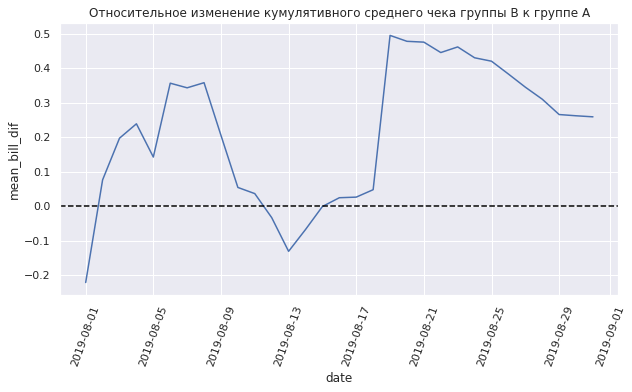

In [8]:
plt.figure(figsize=(10, 5))

ordersagg.assign(mean_bill_another_group = lambda x: x['mean_bill'].shift(-1)).\
    fillna(1).\
    assign(mean_bill_dif = lambda x: x['mean_bill_another_group'] / x['mean_bill'] - 1).\
    query('group == "A"').\
    pipe((sns.lineplot, "data"),x="date", y="mean_bill_dif")

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=70)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#### 4. Построим график кумулятивной конверсии по группам

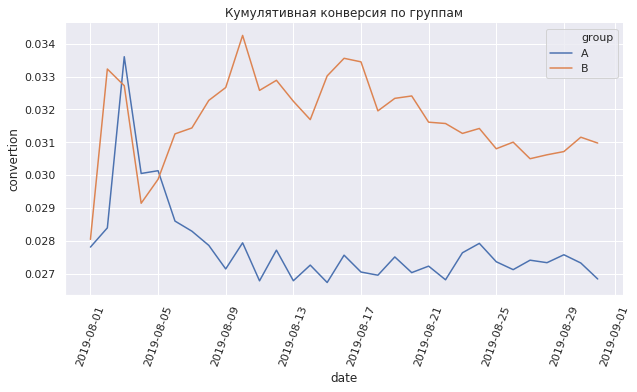

In [9]:
ordersagg = ordersagg.eval('convertion = visitorid / visitors')

plt.figure(figsize=(10, 5))
#fig = sns.figsize(8,12)
sns.lineplot(x="date", y="convertion", hue="group", data=ordersagg)
sns.despine()
plt.title('Кумулятивная конверсия по группам')
plt.xticks(rotation=70)
plt.show()

Кумулятивная конверсия по группе **В** явно выше, чем в группе **А**.

#### 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A

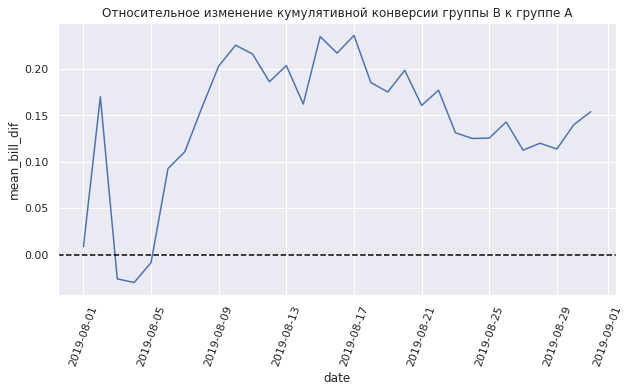

In [10]:
plt.figure(figsize=(10, 5))

ordersagg.assign(convertion_another_group = lambda x: x['convertion'].shift(-1)).\
    fillna(1).\
    assign(mean_bill_dif = lambda x: x['convertion_another_group'] / x['convertion'] - 1).\
    query('group == "A"').\
    pipe((sns.lineplot, "data"),x="date", y="mean_bill_dif")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=70)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Видим еще одно подтверждение описанного выше факта

#### 6. Построим точечный график количества заказов по пользователям

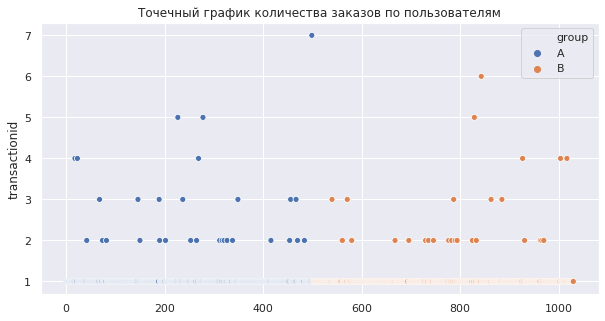

In [11]:
x_range = pd.Series(range(0,len(orders['visitorid'].unique())))

plt.figure(figsize=(10, 5))
orders.groupby(['group','visitorid']).agg({'transactionid':'count'}).\
    reset_index().\
    pipe((sns.scatterplot, "data"),x=x_range, y="transactionid", hue='group')

plt.title('Точечный график количества заказов по пользователям')
plt.show()

In [12]:
orders.\
    drop(['group', 'revenue', 'date'], axis=1).\
    groupby('visitorid').\
    agg({'transactionid' : 'nunique'}).\
    reset_index().\
    sort_values(by='transactionid', ascending=False).\
    head(10)

,visitorid,transactionid
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


В основном посетители делают 1 или 2 заказа. 4 и более заказов уже выглядят как исключение. Теперь понятно, почему график среднего чека ведет себя также как и график конверсии.

#### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберием границу для определения аномальных пользователей.

In [13]:
def procentiles(df,column):
    """Ф-ция возврашает значения 95 и 99 процентиля колонки column датафрейма df"""
    return np.percentile(df[column], [95, 99])

orders.\
    drop(['group', 'revenue', 'date'], axis=1).\
    groupby('visitorid').\
    agg({'transactionid' : 'nunique'}).\
    reset_index().\
    sort_values(by='transactionid', ascending=False).\
    pipe((procentiles),column='transactionid')

array([2., 4.])

Отлично! Лишнее подтверждение нашего утверждения, что все пользователи с 4 и выше заказами являются аномальными в нашей выборке.

#### 8. Построим точечный график стоимостей заказов

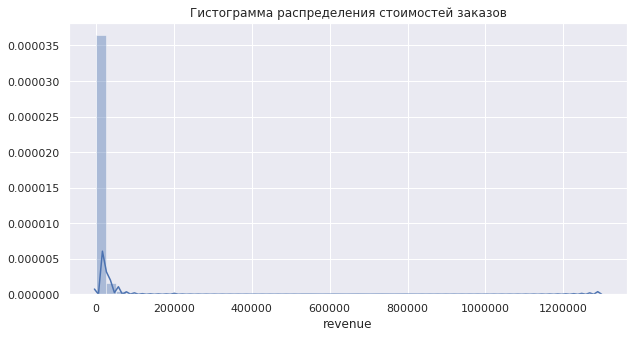

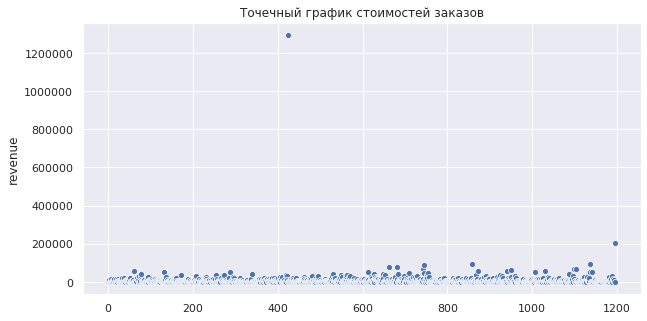

In [14]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10, 5))
sns.distplot(orders['revenue'])
plt.title('Гистограмма распределения стоимостей заказов')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_values, y=orders['revenue'], data=orders)
plt.title('Точечный график стоимостей заказов')
plt.show()

Явно выбиваются два заказа более 200к. Видимо, это как раз то, что мы искали.

#### 9.  Посчитаем 95-й и 99-й перцентили стоимости заказов

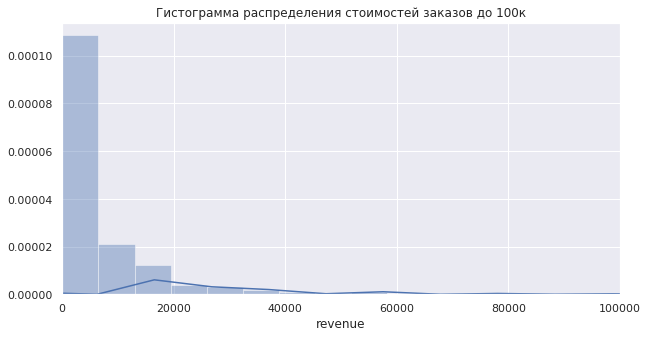

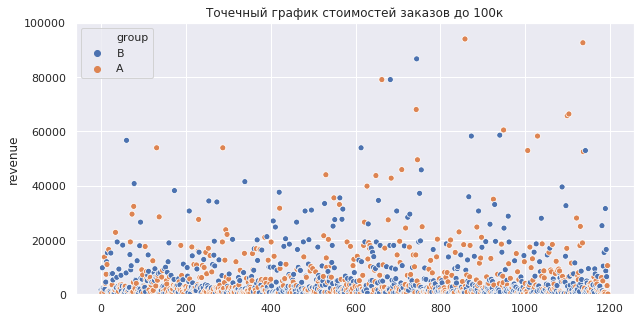

In [15]:
# обрежем графики до чека в 100к и посмотрим поближе
plt.figure(figsize=(10, 5))
sns.distplot(orders['revenue'], bins=200)
plt.title('Гистограмма распределения стоимостей заказов до 100к')
plt.xlim(0, 100000)
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_values, y=orders['revenue'], data=orders, hue='group')
plt.title('Точечный график стоимостей заказов до 100к')
plt.ylim(0, 100000)
plt.show()

In [16]:
# найдем 95 и 99 процентили
orders.pipe((procentiles),column='revenue')

array([28000. , 58233.2])

Можем отсеять все заказы свыше 28к

#### Отфильтруем таблицу **orders** в соответствии с проведеннным выше анализом

In [17]:
# создадим таблицу с id у которых 4 и более заказов
id_with_too_many_orders = orders.\
    drop(['group', 'revenue', 'date'], axis=1).\
    groupby('visitorid').\
    agg({'transactionid' : 'nunique'}).\
    reset_index().\
    query('transactionid > 3').\
    filter(['visitorid']).\
    reset_index(drop=True)

# уберем такие id и отсеим заказы 28к и выше
orders_clear = pd.merge(orders,id_with_too_many_orders,\
         on=['visitorid'],\
         how='outer',\
         indicator=True).\
    query('_merge == "left_only" & revenue < 28000').\
    drop(columns=['_merge'])

#### Построим графики с учетом отсеянных значений

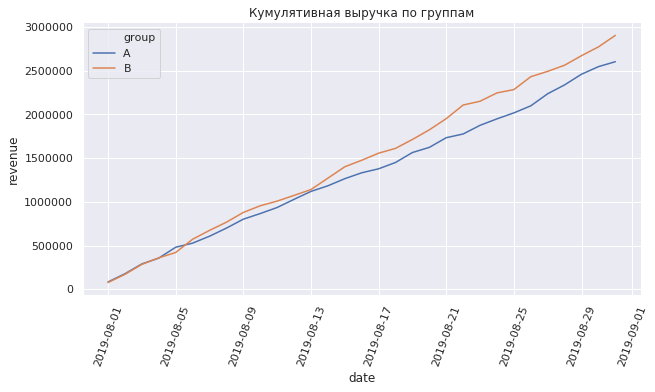

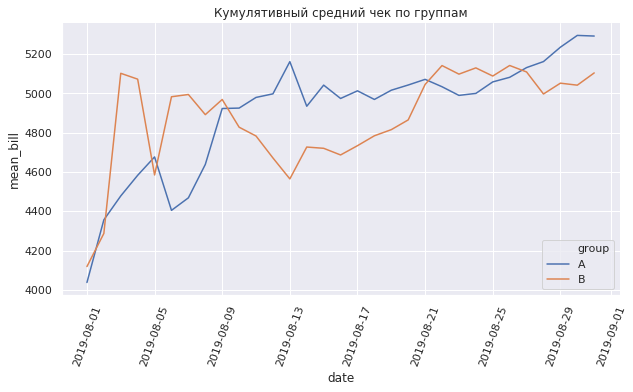

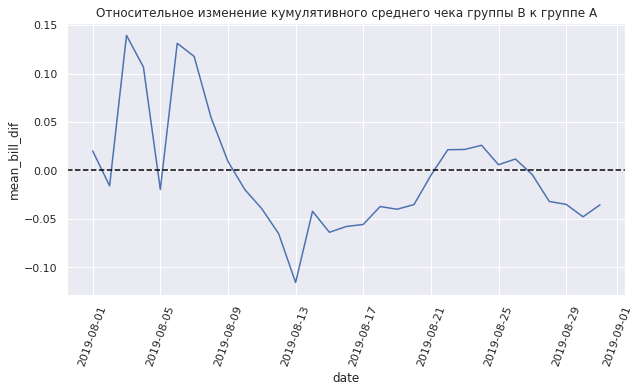

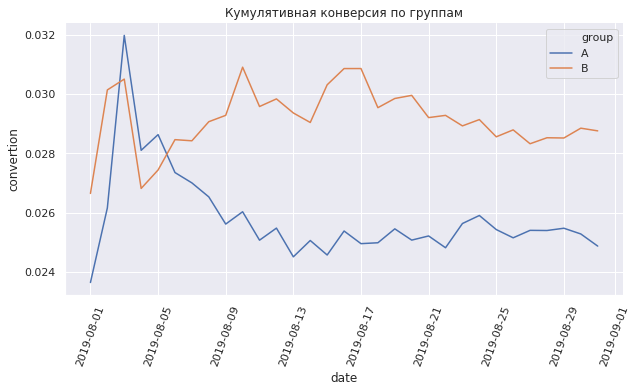

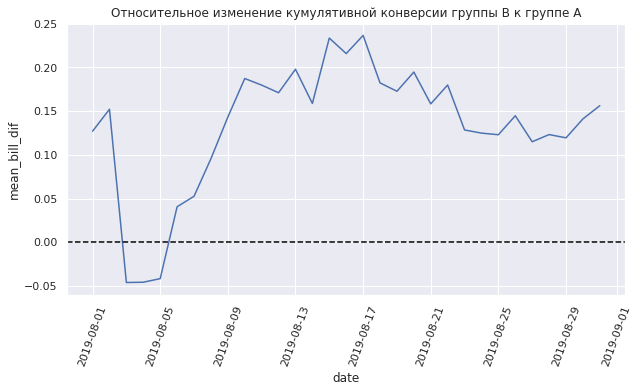

In [18]:
# функция, которая считаем кумулятивную выручку, количество уникальных транзакций и клиентов
comulate_culc_func_new = lambda x: orders_clear[np.logical_and(orders_clear['date'] <= x['date'],\
                                                               orders_clear['group'] == x['group'])].\
    agg({'date' : 'max', \
          'group' : 'max', \
          'transactionid' : pd.Series.nunique, 
          'visitorid' : pd.Series.nunique, \
          'revenue' : 'sum'})

# применим и отсортируем
ordersagg_new = orders_clear[['date','group']].drop_duplicates().\
    apply(comulate_culc_func_new, axis=1).\
    sort_values(by=['date','group'])


ordersagg_new = pd.merge(ordersagg_new,visitsagg, on=['date','group'],how='left')

sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
#fig = sns.figsize(8,12)
sns.lineplot(x="date", y="revenue", hue="group", data=ordersagg_new)
sns.despine()
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=70)
plt.show()

#------------------------------------------------------------------------
ordersagg_new = ordersagg_new.eval('mean_bill = revenue / transactionid')

plt.figure(figsize=(10, 5))
sns.lineplot(x="date", y="mean_bill", hue="group", data=ordersagg_new)
sns.despine()
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=70)
plt.show()

#------------------------------------------------------------------------
plt.figure(figsize=(10, 5))
ordersagg_new.assign(mean_bill_another_group = lambda x: x['mean_bill'].shift(-1)).\
    fillna(1).\
    assign(mean_bill_dif = lambda x: x['mean_bill_another_group'] / x['mean_bill'] - 1).\
    query('group == "A"').\
    pipe((sns.lineplot, "data"),x="date", y="mean_bill_dif")

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=70)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#------------------------------------------------------------------------
ordersagg_new = ordersagg_new.eval('convertion = visitorid / visitors')

plt.figure(figsize=(10, 5))
#fig = sns.figsize(8,12)
sns.lineplot(x="date", y="convertion", hue="group", data=ordersagg_new)
sns.despine()
plt.title('Кумулятивная конверсия по группам')
plt.xticks(rotation=70)
plt.show()

#------------------------------------------------------------------------
plt.figure(figsize=(10, 5))

ordersagg_new.assign(convertion_another_group = lambda x: x['convertion'].shift(-1)).\
    fillna(1).\
    assign(mean_bill_dif = lambda x: x['convertion_another_group'] / x['convertion'] - 1).\
    query('group == "A"').\
    pipe((sns.lineplot, "data"),x="date", y="mean_bill_dif")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=70)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Теперь мы видим, что в отсутствие выбросов ситуация изменилась: кумулятивная выручка по группе **В** все еще явным образом опережает выручку по группе **А**, однако кумулятивный средний чек больше в группе **А**. Конверсия также выше по группе **B**, причем показатель, характеризующий разницу зафиксировался в районе 15%.

#### 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [19]:
# подготовим данные для теста
stat_test_convertion = pd.merge(visits.groupby(['group']).agg({'visitors':'sum'}).reset_index(),
         orders.groupby(['group']).agg({'visitorid':'nunique'}).reset_index().rename(columns={'visitorid':'buyers'}),
         on='group',
         how='left').\
eval('p = buyers / visitors')

display(stat_test_convertion)

,group,visitors,buyers,p
0,A,18736,503,0.026847
1,B,18916,586,0.030979


In [20]:
from scipy import stats as st

alpha = .05 # критический уровень статистической значимости

p_a = stat_test_convertion[stat_test_convertion['group'] == 'A']['p'].sum() #конверсия 1 группы
p_b = stat_test_convertion[stat_test_convertion['group'] == 'B']['p'].sum() #конверсия 2 группы

p_combined = stat_test_convertion['buyers'].sum()/stat_test_convertion['visitors'].sum() #суммарная конверсия
difference = p_a - p_b

z_value = difference / mth.sqrt(p_combined * (1-p_combined)*\
                                (1/stat_test_convertion[stat_test_convertion['group'] == 'A']['visitors'].sum()+\
                                 1/stat_test_convertion[stat_test_convertion['group'] == 'B']['visitors'].sum()))

distr = st.norm(0,1)

p_value = (1 - distr.cdf(abs(z_value))) * 2 #проверяем двухстороннюю гипотезу


print('p-значение: ', p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.016744645350056153
Отвергаем нулевую гипотезу: между долями есть значимая разница


Отлично. Получили значивые различия в конверии рассматриваемых тестов. Конверсия эксперимента **В** больше. Значит в данном тесте отдаем предпочтение ему.

#### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Построим гистограмму и проверим данные на нормальность. Если данные нормально распределены, то будет использовать t-тест Стьюдента, инче - непараметрический тест Манна-Уитни. Нам достаточно проверить одну выборку, например, по группе **А**.

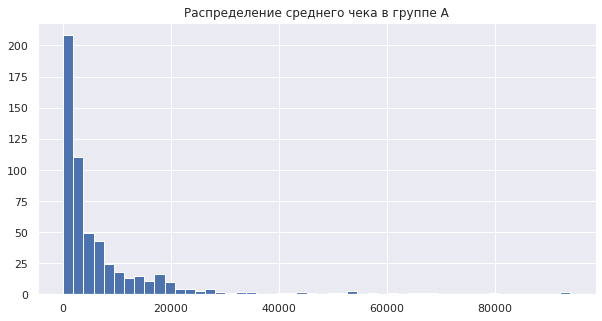

Критерий Шапиро.p-value =  1.739703399801917e-34


In [21]:
plt.figure(figsize=(10, 5))
orders[orders['group']=='A']['revenue'].hist(bins=50)
plt.title('Распределение среднего чека в группе А')
plt.show()

# проверим на нормальность, используя критерий Шапиро
print('Критерий Шапиро.p-value = ',st.shapiro(orders[orders['group']=='A']['revenue'])[1])

In [22]:
# распределение не является нормальным: это видно уже по гистограмме, тест Шапиро лишь подтверждает наши выводы
# применяем Манна-Уитни
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                          orders[orders['group']=='B']['revenue'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


#### 12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

In [23]:
# подготовим данные для теста
# мы отсеяли всего 12 visitorid, поэтому не будем разбивать их на группы и вычитать. оставим так
stat_test_convertion_clear = pd.merge(visits.groupby(['group']).agg({'visitors':'sum'}).reset_index(),
         orders_clear.groupby(['group']).agg({'visitorid':'nunique'}).reset_index().rename(columns={'visitorid':'buyers'}),
         on='group',
         how='left').\
eval('p = buyers / visitors')

display(stat_test_convertion_clear)

,group,visitors,buyers,p
0,A,18736,466,0.024872
1,B,18916,544,0.028759


In [24]:
p_a_new = stat_test_convertion_clear[stat_test_convertion_clear['group'] == 'A']['p'].sum() #конверсия 1 группы
p_b_new = stat_test_convertion_clear[stat_test_convertion_clear['group'] == 'B']['p'].sum() #конверсия 2 группы

p_combined_new = stat_test_convertion_clear['buyers'].sum()/stat_test_convertion_clear['visitors'].sum() #суммарная конверсия
difference_new = p_a_new - p_b_new

z_value_new = difference_new / mth.sqrt(p_combined_new * (1-p_combined_new)*\
                                (1/stat_test_convertion_clear[stat_test_convertion_clear['group'] == 'A']['visitors'].sum()+\
                                 1/stat_test_convertion_clear[stat_test_convertion_clear['group'] == 'B']['visitors'].sum()))

p_value_new = (1 - distr.cdf(abs(z_value_new))) * 2 #проверяем двухстороннюю гипотезу


print('p-значение: ', p_value_new)

if p_value_new < alpha:
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.019598467215852455
Отвергаем нулевую гипотезу: между долями есть значимая разница


Результат поменялся, но не сильно. Конверсия группы **В** все еще больше, и разница с группой **А** является статистически значимой.

#### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Будем считать аналогично пункту 11.

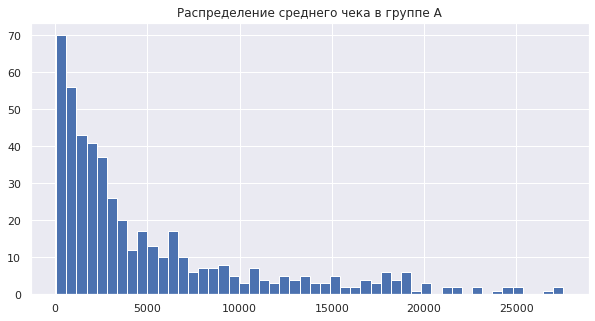

Критерий Шапиро.p-value =  1.739703399801917e-34
p-значение:  0.3616705892431754
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [25]:
plt.figure(figsize=(10, 5))
orders_clear[orders_clear['group']=='A']['revenue'].hist(bins=50)
plt.title('Распределение среднего чека в группе А')
plt.show()

# проверим на нормальность, используя критерий Шапиро
print('Критерий Шапиро.p-value = ',st.shapiro(orders[orders['group']=='A']['revenue'])[1])

# применяем Манна-Уитни
results_new = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], 
                          orders_clear[orders_clear['group']=='B']['revenue'])

print('p-значение: ', results_new.pvalue)

if (results_new.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

### Выводы

Сделаем выводы по "отчищенным" данным, так как перед процедурой отчистки мы наблюдали явняе выбросы, которые сильно искажали результаты.

1. Кумулятивная выручка по группе **В** устойчиво опережает выручку по группе **А**;
1. Кумулятивный средний чек больше в группе **А**, однако разничия не являются статистически значимыми;
1. Кумулятивная конверсия выше по группе **В**. Стат тест показал статистически значимые различия в конверсии в пользу группы **В**.

**Результат: стоит оставновить тест и зафиксировать победу группы В**